In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate


In [2]:
### createLeader takes an array of [t,v] coordinates and returns a numpy array of [t,x,v] coordinates
def createLeader(le):
    le = np.array(le)
    le = np.array([np.cumsum(le[:, 0]), np.cumsum(le[:, 0] * le[:, 1]), le[:, 1]]).T
    le = np.vstack([[0, 0, 0], le])
    le[0:-1, 2] = le[1:, 2]
    return le

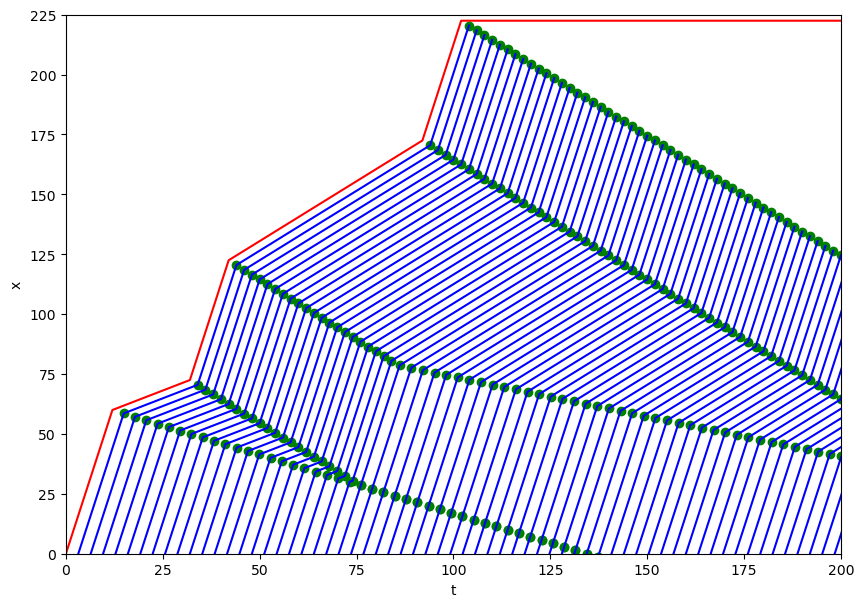

In [3]:
# plt.clf()
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim([-50, 150])

# define the constants of the newell car following model. these are arbitrary.
vf, τ, δ = 5, 2, 2
# leader is a numpy array of [t,x,v] coordinates
leader = createLeader(
    [
        [12, vf],
        #     [20,vf/9],
        [20, vf / 8],
        [10, vf],
        [50, vf * 0.2],
        [10, vf],
        [200, 0],
    ]
)

ax.plot(leader[:, 0], leader[:, 1], color="red")  # plot the leader in red

# set the time and space bounds to whatever you want
ax.set_xlim([0, 200])
ax.set_ylim([0, 225])
ax.set_xlabel("t")
ax.set_ylabel("x")
# now make all the other cars
N = 45  # the number of follower cars
s = δ * 4  # the spacing between the followers
# now calculate and plot the follower trajectories
for i in np.arange(1, 100):
    fol = [[0, -i * δ * 8, vf]]
    for t1, x1, v1 in leader:
        t0, x0, v0 = fol[-1]
        if v1 != v0:
            s0 = (x1 - x0) - (t1 - t0) * v0
            t2 = max(t1 + (s0 - v1 * τ - δ) / (v0 - v1), t0)
            fol.append([t2, x0 + v0 * (t2 - t0), v1])
    leader = np.array(fol)  # set the follower to be new "leader"
    ax.scatter(leader[:, 0], leader[:, 1], c="green")  # plot the new "leader" trajectory
    ax.plot(leader[:, 0], leader[:, 1], c="blue")  # plot the new "leader" trajectory

In [56]:
# fig.savefig('../exam/trajectories.png',dpi=200)

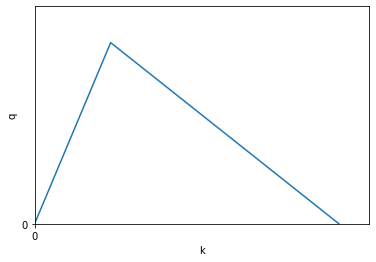

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
ks = [0, 1 / (τ * vf), 1 / δ]
qs = [0, 1 / τ, 0]
plt.plot(ks, qs)
ax.set_ylabel("q")
ax.set_xlabel("k")
ax.set_ylim([0, 1.2])
ax.set_xlim([0, 0.55])
ax.set_yticks([0])
ax.set_xticks([0])
# ax.scatter(0,0,s=100)
# ax.plot([0,.5],[0,.5*.5*vf])
# ax.scatter(1/(7.5*δ),vf/(7.5*δ))
# ax.scatter(0,0,s=10)
# fig.savefig('../exam/trajectory-fd.png',dpi=200)